Loading the Dataset

In [41]:
import pandas as pd

file_path = '/content/mldata.csv'
data = pd.read_csv(file_path)

In [42]:
data.head()

,Logical quotient rating,hackathons,coding skills rating,public speaking points,self-learning capability?,Extra-courses did,certifications,workshops,reading and writing skills,memory capability score,Interested subjects,interested career area,Type of company want to settle in?,Taken inputs from seniors or elders,Interested Type of Books,Management or Technical,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,5,0,6,2,yes,no,information security,testing,poor,poor,programming,testing,BPA,no,Series,Management,smart worker,yes,no,Applications Developer
1,7,6,4,3,no,yes,shell programming,testing,excellent,medium,Management,system developer,Cloud Services,yes,Autobiographies,Technical,hard worker,no,yes,Applications Developer
2,2,3,9,1,no,yes,information security,testing,excellent,poor,data engineering,Business process analyst,product development,yes,Travel,Technical,smart worker,no,no,Applications Developer
3,2,6,3,5,no,yes,r programming,database security,excellent,poor,networks,testing,Testing and Maintainance Services,yes,Guide,Management,smart worker,yes,yes,Applications Developer
4,2,0,3,4,yes,no,distro making,game development,excellent,medium,Software Engineering,system developer,BPA,no,Health,Technical,hard worker,yes,no,Applications Developer


In [43]:
# Get the shape of the DataFrame
shape = data.shape

# Print the shape
print("The shape of the dataset is:", shape)


The shape of the dataset is: (6901, 20)


Data Preprocessing

In [44]:
data.columns

Index(['Logical quotient rating', 'hackathons', 'coding skills rating',
       'public speaking points', 'self-learning capability?',
       'Extra-courses did', 'certifications', 'workshops',
       'reading and writing skills', 'memory capability score',
       'Interested subjects', 'interested career area ',
       'Type of company want to settle in?',
       'Taken inputs from seniors or elders', 'Interested Type of Books',
       'Management or Technical', 'hard/smart worker', 'worked in teams ever?',
       'Introvert', 'Suggested Job Role'],
      dtype='object')

In [45]:
# Identify numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
print("Numerical features:")
print(numerical_cols)



Numerical features:
Index(['Logical quotient rating', 'hackathons', 'coding skills rating',
       'public speaking points'],
      dtype='object')


In [46]:
# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
print("\nCategorical features:")
print(categorical_cols)


Categorical features:
Index(['self-learning capability?', 'Extra-courses did', 'certifications',
       'workshops', 'reading and writing skills', 'memory capability score',
       'Interested subjects', 'interested career area ',
       'Type of company want to settle in?',
       'Taken inputs from seniors or elders', 'Interested Type of Books',
       'Management or Technical', 'hard/smart worker', 'worked in teams ever?',
       'Introvert', 'Suggested Job Role'],
      dtype='object')


In [47]:
# Checking if there are any missing values in our dataset
missing_values = data.isnull().values.any()

print("Is there any missing value in the DataSet?", missing_values)

data.isnull().sum(axis=0)


Is there any missing value in the DataSet? False


,0
Logical quotient rating,0
hackathons,0
coding skills rating,0
public speaking points,0
self-learning capability?,0
Extra-courses did,0
certifications,0
workshops,0
reading and writing skills,0
memory capability score,0


In [48]:
# Checking for unique/distinct values in categorical features in the data

categorical_features = ['self-learning capability?', 'Extra-courses did', 'certifications', 'workshops',
                        'reading and writing skills', 'memory capability score', 'Interested subjects',
                        'interested career area ', 'Type of company want to settle in?',
                        'Taken inputs from seniors or elders', 'Interested Type of Books',
                        'Management or Technical', 'hard/smart worker', 'worked in teams ever?',
                        'Introvert', 'Suggested Job Role']

for feature in categorical_features:
    print(f"Unique values in '{feature}':")
    print(data[feature].value_counts())
    print("\n")  # Add spacing between each feature's output

Unique values in 'self-learning capability?':
self-learning capability?
yes    3496
no     3405
Name: count, dtype: int64


Unique values in 'Extra-courses did':
Extra-courses did
no     3529
yes    3372
Name: count, dtype: int64


Unique values in 'certifications':
certifications
r programming           803
information security    785
shell programming       783
machine learning        783
full stack              768
hadoop                  764
python                  756
distro making           740
app development         719
Name: count, dtype: int64


Unique values in 'workshops':
workshops
database security    897
system designing     891
web technologies     891
hacking              867
testing              852
data science         842
game development     831
cloud computing      830
Name: count, dtype: int64


Unique values in 'reading and writing skills':
reading and writing skills
excellent    2328
medium       2315
poor         2258
Name: count, dtype: int64


Unique values 

In [49]:
# Now lets find out the summary of numerical features

print(data[['Logical quotient rating', 'hackathons', 'coding skills rating', 'public speaking points']].describe())


       Logical quotient rating   hackathons  coding skills rating  \
count              6901.000000  6901.000000           6901.000000   
mean                  4.991016     2.999710              5.010723   
std                   2.577704     2.010191              2.568347   
min                   1.000000     0.000000              1.000000   
25%                   3.000000     1.000000              3.000000   
50%                   5.000000     3.000000              5.000000   
75%                   7.000000     5.000000              7.000000   
max                   9.000000     6.000000              9.000000   

       public speaking points  
count             6901.000000  
mean                 4.988263  
std                  2.599500  
min                  1.000000  
25%                  3.000000  
50%                  5.000000  
75%                  7.000000  
max                  9.000000  


Exploratory Data Analysis

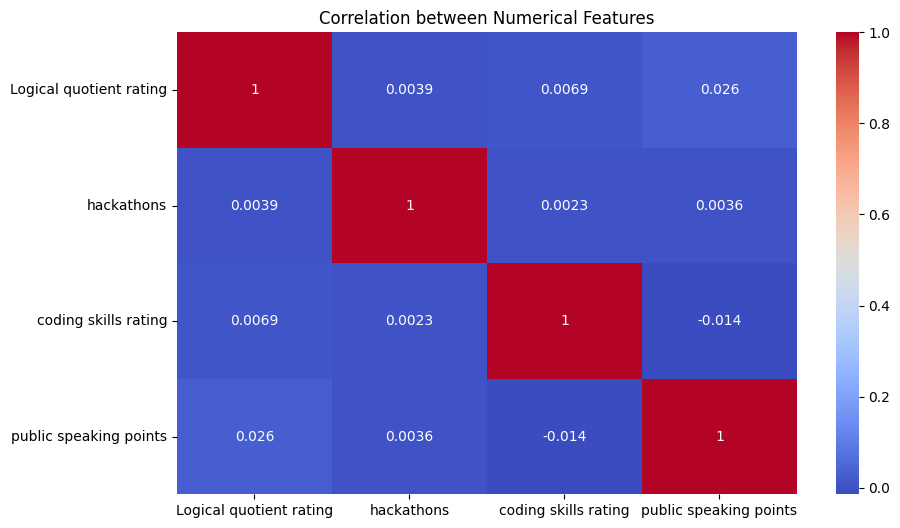

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix for numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(data[['Logical quotient rating', 'hackathons', 'coding skills rating', 'public speaking points']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Numerical Features')
plt.show()


After looking at the above heatmap we found out that there is no highly correlated numerical pair.

FEATURE ENGINEERING

A) Binary Encoding
["self-learning capability?", "Extra-courses did","Taken inputs from seniors or elders", "worked in teams ever?", "Introvert"] these columns have yes or no, so we will use binary encoding.


In [51]:
cols = data[["self-learning capability?", "Extra-courses did","Taken inputs from seniors or elders", "worked in teams ever?", "Introvert"]]
for i in cols:
    cleanup_nums = {i: {"yes": 1, "no": 0}}
    data = data.replace(cleanup_nums)

<ipython-input-51-d9ca105c0eac>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace(cleanup_nums)


In [52]:
print("\n\nList of Categorical features: \n" , data.select_dtypes(include=['object']).columns.tolist())




List of Categorical features: 
 ['certifications', 'workshops', 'reading and writing skills', 'memory capability score', 'Interested subjects', 'interested career area ', 'Type of company want to settle in?', 'Interested Type of Books', 'Management or Technical', 'hard/smart worker', 'Suggested Job Role']


B) Number Encoding

In [53]:
mycol = data[["reading and writing skills", "memory capability score"]]
for i in mycol:
    cleanup_nums = {i: {"poor": 0, "medium": 1, "excellent": 2}}
    data = data.replace(cleanup_nums)

category_cols = data[['certifications', 'workshops', 'Interested subjects', 'interested career area ', 'Type of company want to settle in?',
                    'Interested Type of Books']]
for i in category_cols:
    data[i] = data[i].astype('category')
    data[i + "_code"] = data[i].cat.codes

print("\n\nList of Categorical features: \n" , data.select_dtypes(include=['object']).columns.tolist())



List of Categorical features: 
 ['Management or Technical', 'hard/smart worker', 'Suggested Job Role']


<ipython-input-53-f646ce18cacb>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace(cleanup_nums)


C) Dummy Variable Encoding

In [54]:
print(data['Management or Technical'].unique())
print(data['hard/smart worker'].unique())

['Management' 'Technical']
['smart worker' 'hard worker']


In [55]:
data = pd.get_dummies(data, columns=["Management or Technical", "hard/smart worker"], prefix=["A", "B"], dtype = int)
data.head()

,Logical quotient rating,hackathons,coding skills rating,public speaking points,self-learning capability?,Extra-courses did,certifications,workshops,reading and writing skills,memory capability score,...,certifications_code,workshops_code,Interested subjects_code,interested career area _code,Type of company want to settle in?_code,Interested Type of Books_code,A_Management,A_Technical,B_hard worker,B_smart worker
0,5,0,6,2,1,0,information security,testing,0,0,...,4,6,9,5,0,28,1,0,0,1
1,7,6,4,3,0,1,shell programming,testing,2,1,...,8,6,2,4,1,3,0,1,1,0
2,2,3,9,1,0,1,information security,testing,2,0,...,4,6,5,0,9,29,0,1,0,1
3,2,6,3,5,0,1,r programming,database security,2,0,...,7,2,7,5,7,13,1,0,0,1
4,2,0,3,4,1,0,distro making,game development,2,1,...,1,3,3,4,0,14,0,1,1,0


In [56]:
import numpy as np

print("List of Numerical features: \n" , data.select_dtypes(include=np.number).columns.tolist())

List of Numerical features: 
 ['Logical quotient rating', 'hackathons', 'coding skills rating', 'public speaking points', 'self-learning capability?', 'Extra-courses did', 'reading and writing skills', 'memory capability score', 'Taken inputs from seniors or elders', 'worked in teams ever?', 'Introvert', 'certifications_code', 'workshops_code', 'Interested subjects_code', 'interested career area _code', 'Type of company want to settle in?_code', 'Interested Type of Books_code', 'A_Management', 'A_Technical', 'B_hard worker', 'B_smart worker']


In [57]:
print(data['Suggested Job Role'].unique())

['Applications Developer' 'CRM Technical Developer' 'Database Developer'
 'Mobile Applications Developer' 'Network Security Engineer'
 'Software Developer' 'Software Engineer'
 'Software Quality Assurance (QA) / Testing'
 'Systems Security Administrator' 'Technical Support' 'UX Designer'
 'Web Developer']


In [58]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Suggested Job Role_code'] = label_encoder.fit_transform(data['Suggested Job Role'])

Train and Test Split

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler


feed = data[['Logical quotient rating', 'coding skills rating', 'hackathons', 'public speaking points', 'self-learning capability?','Extra-courses did',
           'Taken inputs from seniors or elders', 'worked in teams ever?', 'Introvert', 'reading and writing skills', 'memory capability score',
           'B_hard worker', 'B_smart worker', 'A_Management', 'A_Technical', 'Interested subjects_code', 'Interested Type of Books_code', 'certifications_code',
           'workshops_code', 'Type of company want to settle in?_code',  'interested career area _code',
             'Suggested Job Role']]

# Taking all independent variable columns
data_train_x = data[feed.columns[:-1]]

# Target variable column
data_train_y = data['Suggested Job Role_code']

x_train, x_test, y_train, y_test = train_test_split(data_train_x, data_train_y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = RobustScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Box plot and Heat map of the numerical features

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

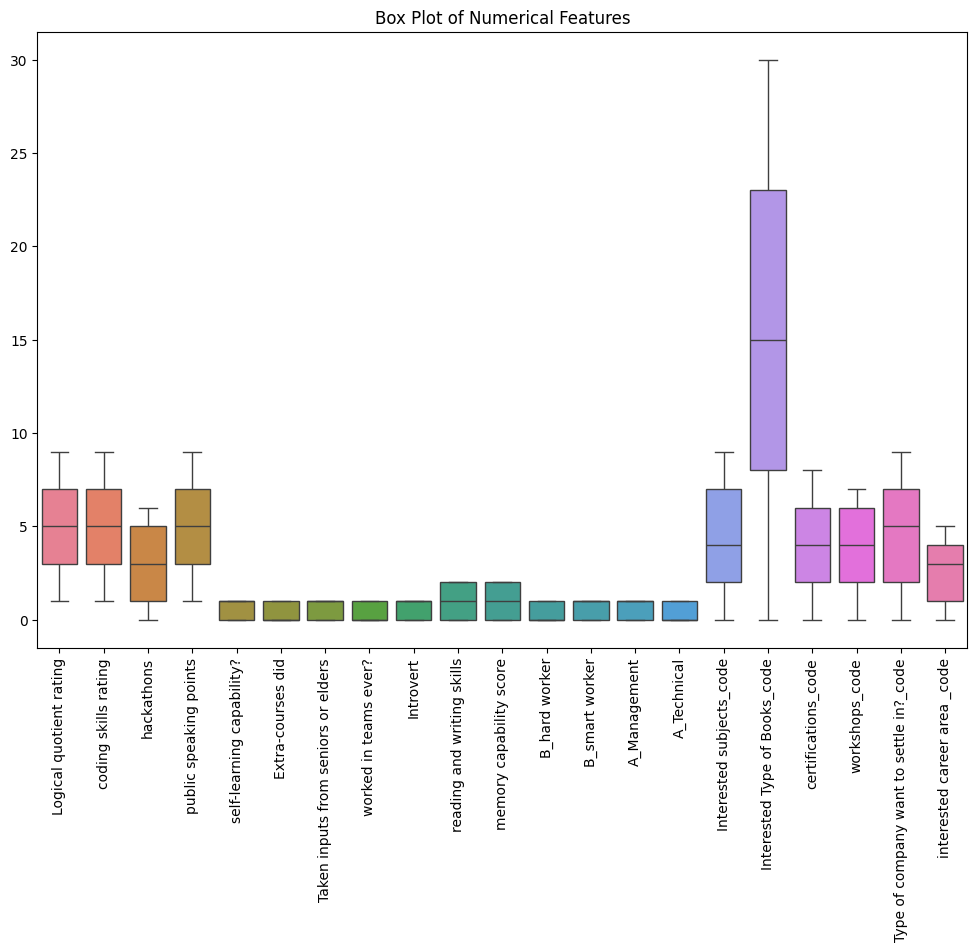

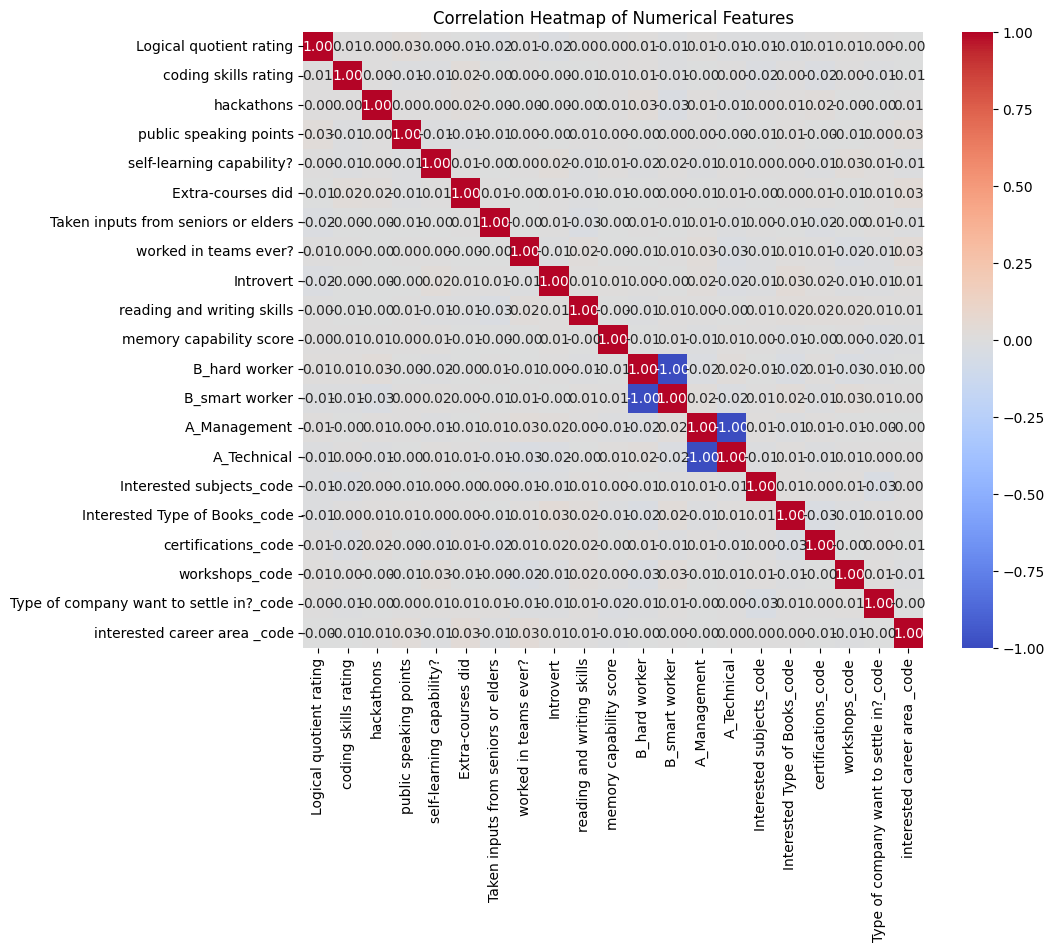

In [60]:
numerical_feed = feed.select_dtypes(include=[np.number])

# Plotting boxplots for numerical columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=numerical_feed)
plt.xticks(rotation=90)  # Rotate labels for better readability if there are many columns
plt.title('Box Plot of Numerical Features')
plt.show()

# Plotting correlation heatmap for numerical columns
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_feed.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Elastic Net Model

Numerical Predictions: [4.53104541 2.48977628 5.47932598 ... 5.29471583 3.07237336 2.58811291]
Predicted Job Roles: ['Software Developer' 'Database Developer' 'Software Developer' ...
 'Software Developer' 'Mobile Applications Developer'
 'Mobile Applications Developer']


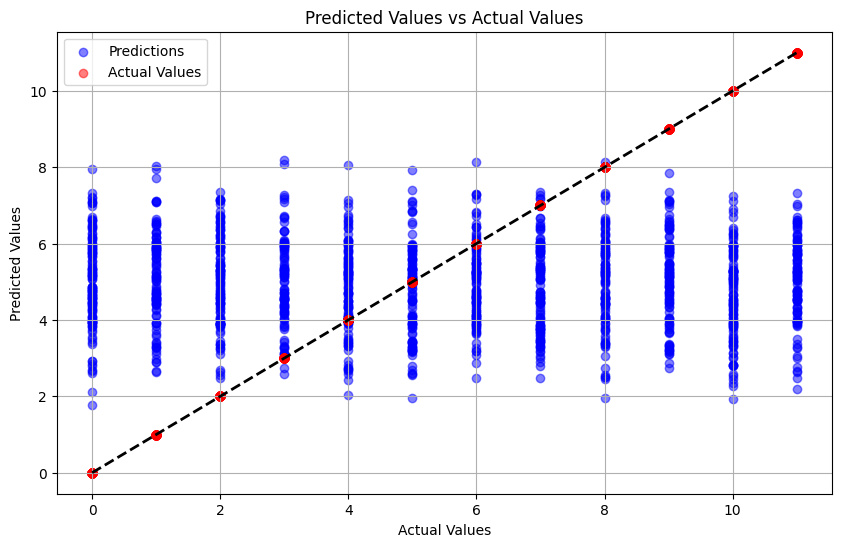

In [70]:
import numpy as np
import matplotlib.pyplot as plt

class ElasticNetModel:

    def __init__(self, lambdas=1.0, l1_ratio=0.5, iterations=10000, learning_rate=0.001):
        self.lambdas = lambdas
        self.l1_ratio = l1_ratio
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.coef_ = None
        self.intercept_ = 0

    def fit(self, X, y):

        n_samples, n_features = X.shape
        self.coef_ = np.zeros(n_features)
        self.intercept_ = 0

        # Performing gradient descent
        for _ in range(self.iterations):
            current_predictions = np.dot(X, self.coef_) + self.intercept_
            residuals = current_predictions - y

            # Computing gradients for coefficients
            # First, we calculate the gradient from the residuals
            residual_gradient = np.dot(X.T, residuals) / n_samples

            # Computing the L1 regularization term
            l1_term = self.l1_ratio * self.lambdas * np.sign(self.coef_)

            # Computing the L2 regularization term
            l2_term = (1 - self.l1_ratio) * self.lambdas * 2 * self.coef_

            # Combining the gradients from residuals, L1, and L2 terms
            coef_gradient = residual_gradient + l1_term + l2_term

            # Computing the gradient for the intercept
            intercept_gradient = np.sum(residuals) / n_samples

            # Updating the model parameters
            self.coef_ -= self.learning_rate * coef_gradient
            self.intercept_ -= self.learning_rate * intercept_gradient

        return ElasticNetModelResults(self.coef_, self.intercept_)

class ElasticNetModelResults:
    def __init__(self, coef, intercept):
        self.coef_ = coef
        self.intercept_ = intercept

    def predict(self, X):

        return np.dot(X, self.coef_) + self.intercept_

# Function to calculate MSE
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Function to calculate R²
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)


# Fit and predict using the model
model = ElasticNetModel(lambdas=0.1, l1_ratio=0.5, iterations=1000, learning_rate=0.001)
results = model.fit(x_train_scaled, y_train)
predictions = results.predict(x_test_scaled)

predicted_categories = np.clip(np.round(predictions), 0, len(label_encoder.classes_) - 1).astype(int)
# Convert numeric predictions back to job role labels
predicted_job_roles = label_encoder.inverse_transform(predicted_categories)
print("Numerical Predictions:", predictions)
print("Predicted Job Roles:", predicted_job_roles)

# Calculate and print R² and MSE
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5, color='blue', label='Predictions')
plt.scatter(y_test, y_test, alpha=0.5, color='red', label='Actual Values')
plt.title('Predicted Values vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.legend()
plt.grid(True)
plt.show()

ElasticNetModel implementation in test.py

Predictions: [  7.64406716  -3.91486505   9.04543217 -21.43410974  -4.19068289
  -4.33533676  17.95393009   2.87278517   7.70954363   3.52463095
 -15.33891019 -21.39191417  10.17234674   4.07196966  -7.69550148
  -9.99851451  -7.91093427   0.74461552  -1.94176839   1.1033472
  -0.43021072  12.51827668   2.03347225  27.88970906   9.09785529
   0.83792923  16.46643611  -5.41484608  16.14853632  16.83517
  -9.41228239  10.17345465  10.50798462  14.08293284 -20.25126778
  25.33325895   9.38719368  -4.74321529   5.6573891  -10.1155319
   3.59941121  -6.18286557  23.38931645  18.18675759   9.76337049
  18.98041862   4.329532    -1.31353029   9.57626723  -6.87750981]


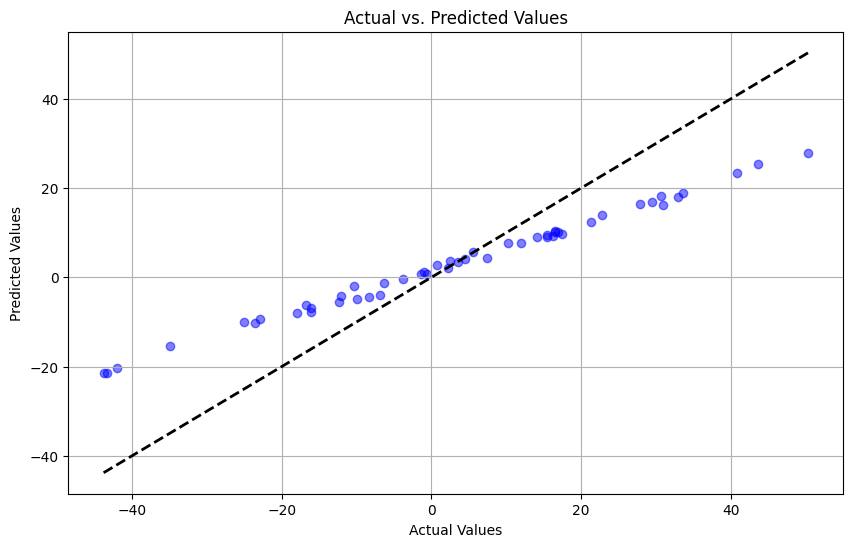

In [71]:
import numpy as np
import csv
from sklearn.preprocessing import StandardScaler  # To standardize the features

# Assuming the ElasticNetModel is defined as provided above

def test_predict():
    model = ElasticNetModel(lambdas=1.0, l1_ratio=0.5, iterations=1000, learning_rate=0.01)
    data = []

    # Load data from the CSV file
    with open("/content/small_test.csv", "r") as file:
        reader = csv.DictReader(file)
        for row in reader:
            # Convert all values to float for consistency
            data.append({k: float(v) for k, v in row.items()})

    # Extract features and targets
    X = np.array([[v for k, v in datum.items() if k.startswith('x')] for datum in data])
    y = np.array([datum['y'] for datum in data if 'y' in datum])

    # Normalize the feature data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Fit the model
    results = model.fit(X_scaled, y)

    # Make predictions
    preds = results.predict(X_scaled)

    # Print predictions to verify outputs
    print("Predictions:", preds)

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.scatter(y, preds, alpha=0.5, color='blue')  # Plot predictions vs actual values
    plt.title('Actual vs. Predicted Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line
    plt.grid(True)
    plt.show()

# Run the test function
test_predict()


Generating random data and implementing the ElasticNetModel

In [66]:
import numpy as np
import csv
import argparse

def generate_data(N, m, b, scale, rnge, seed, output_file):
    def linear_data_generator(m, b, rnge, N, scale, seed):
        rng = np.random.default_rng(seed=seed)
        sample = rng.uniform(low=rnge[0], high=rnge[1], size=(N, len(m)))
        ys = np.dot(sample, np.array(m).reshape(-1, 1)) + b
        noise = rng.normal(loc=0., scale=scale, size=ys.shape)
        return (sample, ys + noise)

    def write_data(filename, X, y):
        with open(filename, "w") as file:
            xs = [f"x_{n}" for n in range(X.shape[1])]
            header = xs + ["y"]
            writer = csv.writer(file)
            writer.writerow(header)
            for row in np.hstack((X, y)):
                writer.writerow(row)

    m = np.array(m)
    X, y = linear_data_generator(m, b, rnge, N, scale, seed)
    write_data(output_file, X, y)

# Calling the function with example parameters
generate_data(100, [3, 2], 5, 1.0, [-10, 10], 42, 'data.csv')


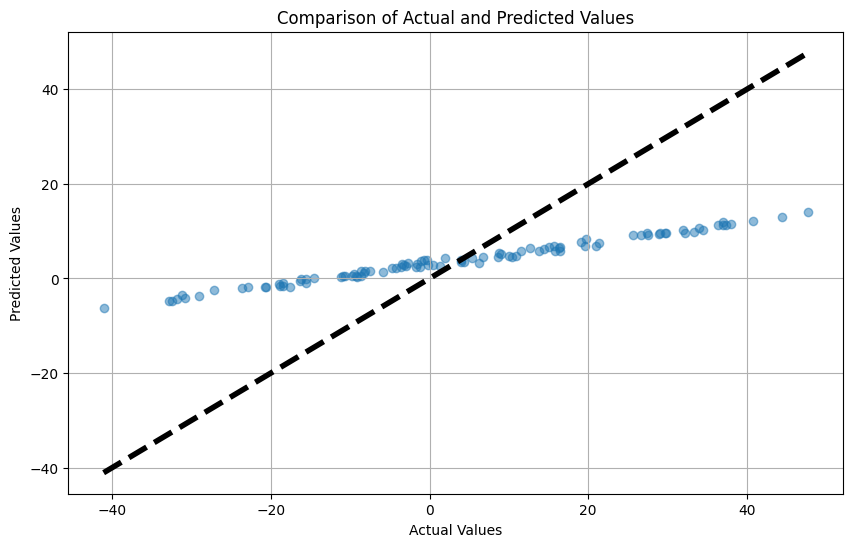

Predictions: [ 6.90053733 10.61569362  3.79760622 10.29100864 -1.14769806  6.79525302
  9.18369642  0.55562317  0.28907358  9.55185114  5.83677731 14.03608926
  4.4573762  -1.02665425  1.56395226 11.94054159  0.53432287  0.49970769
 -0.86576721  2.34672792  6.67149969  4.674284   11.38159103  0.47346149
  2.68336154 -4.77309705  9.3767322   9.52868114  4.24598988 -4.43656239
  5.89559469  7.59846941  6.31368381  2.80463694 -2.51776005 -0.48266223
  5.80805671 -3.75966647  3.10907105  7.68812361  5.181761    4.62488092
 -6.16748562  6.4834837  -0.21009097  1.67474786  2.16384708  2.88550114
 -1.90445995  3.95845718 11.27160658  5.90251764  9.80587102  1.09130434
  3.07843074  0.45739569  2.41920381  3.62420703  9.57639241  4.50612864
  6.65868156 -2.05366859 -1.79521132 -1.72649479 -0.05566228  4.24704419
  3.52012563  0.32877385  9.67898503  3.36731236  3.79829302 10.33186371
  1.3424933   2.14397086 -1.60534872 12.24133188  0.06632484  0.87535114
  2.92727425  9.68106609  3.359149   -

In [68]:
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt


def load_data(filename):
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip the header
        X, y = [], []
        for row in reader:
            X.append([float(num) for num in row[:-1]])
            y.append(float(row[-1]))
        return np.array(X), np.array(y)

def test_model_with_generated_data(filename):
    X, y = load_data(filename)

    scaler = RobustScaler()
    X_scaled = scaler.fit_transform(X)

    model = ElasticNetModel(lambdas=1.0, l1_ratio=0.5, iterations=1000, learning_rate=0.01)
    results = model.fit(X_scaled, y)

    predictions = results.predict(X_scaled)

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.scatter(y, predictions, alpha=0.5)
    plt.title('Comparison of Actual and Predicted Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)  # Diagonal line for reference
    plt.grid(True)
    plt.show()

    print("Predictions:", predictions)
    print("Actuals:", y)
    return predictions, y

predictions, actuals = test_model_with_generated_data('data.csv')
